In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tqdm

In [39]:
s = '....#.....\n.........#\n..........\n..#.......\n.......#..\n..........\n.#..^.....\n........#.\n#.........\n......#...'

### Problem 1

In [40]:
def get_M(s):
    M = []
    temp = s.split('\n')
    for l in temp:
        M.append(list(l))
    M = np.array(M)
    return M

In [41]:
def turn_righ(d):
    if d == [-1, 0]:
        return [0, 1]
    if d == [0, 1]:
        return [1, 0]
    if d == [1, 0]:
        return [0, -1]
    if d == [0, -1]:
        return [-1, 0]

In [42]:
def make_path(M):
    i, j = np.where(M=='^')
    i = i[0]
    j = j[0]
    d = [-1, 0]
    while True:
        M[i, j] = 'X'
        i_next = i + d[0]
        j_next = j + d[1]
        if (i_next>=0) & (i_next<M.shape[0]) & (j_next>=0) & (j_next<M.shape[1]):
            if M[i_next, j_next] != '#':
                i = i_next
                j = j_next
                M[i, j] = '^'
            else:
                d = turn_righ(d)
        else:
            break
    return (M=='X').sum()

In [43]:
M = get_M(s)
make_path(M)

41

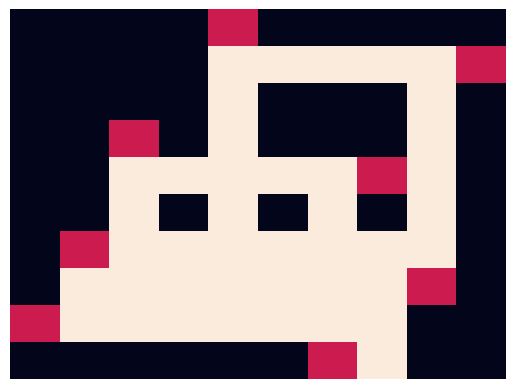

In [44]:
fil = M =='.'
M[fil] = 0
fil = M =='#'
M[fil] = 1
fil = M =='X'
M[fil] = 2
sns.heatmap(M.astype(float), cbar=False)
plt.xticks([]);
plt.yticks([]);
plt.savefig('../d6a.png')

In [45]:
with open('../data/d6.txt') as fin:
    s = fin.read()[:-1]

In [46]:
M = get_M(s)
make_path(M)

4982

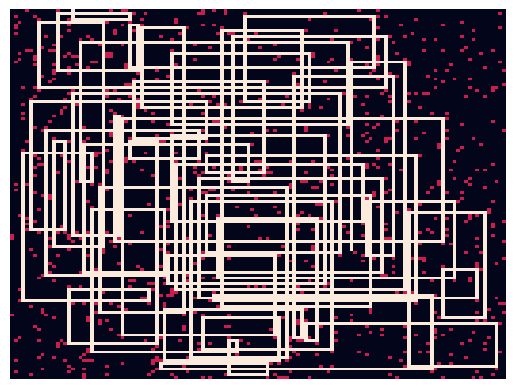

In [47]:
fil = M =='.'
M[fil] = 0
fil = M =='#'
M[fil] = 1
fil = M =='X'
M[fil] = 2
sns.heatmap(M.astype(float), cbar=False)
plt.xticks([]);
plt.yticks([]);
plt.savefig('../d6b.png')

### Problem 2

In [115]:
s = '....#.....\n.........#\n..........\n..#.......\n.......#..\n..........\n.#..^.....\n........#.\n#.........\n......#...'

In [116]:
def return_path(M):
    path = []
    temp = np.where(M=='^')
    i = temp[0][0]
    j = temp[1][0]
    d = [-1, 0]
    while True:
        M[i, j] = 'X'
        i_next = i + d[0]
        j_next = j + d[1]
        if (i_next>=0) & (i_next<M.shape[0]) & (j_next>=0) & (j_next<M.shape[1]):
            if M[i_next, j_next] != '#':
                path.append((i, j, d[0], d[1]))
                i = i_next
                j = j_next
                M[i, j] = '^'
            else:
                d = turn_righ(d)
        else:
            break
    return path

In [117]:
def is_ther_circle(M, io, jo):
    path = []
    temp = np.where(M=='^')
    i = temp[0][0]
    j = temp[1][0]
    if (io, jo) != (i, j):
        M[io, jo] = '#'
    else:
        return False, M
    d = [-1, 0]
    while True:
        if (i, j, d[0], d[1]) in path:
            return True, M
        M[i, j] = 'X'
        i_next = i + d[0]
        j_next = j + d[1]
        if (i_next>=0) & (i_next<M.shape[0]) & (j_next>=0) & (j_next<M.shape[1]):
            if M[i_next, j_next] != '#':
                path.append((i, j, d[0], d[1]))
                i = i_next
                j = j_next
                M[i, j] = '^'
            else:
                d = turn_righ(d)
        else:
            break
    return False, M

In [118]:
M = get_M(s)
path = return_path(M.copy())
n = 0
for p in tqdm.tqdm(path[1:]):
    a, b = is_ther_circle(M.copy(), p[0], p[1])
    if a:
        n+=1
n

100%|██████████| 43/43 [00:00<00:00, 7704.52it/s]


6

In [122]:
M = get_M(s)
n = 0
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        a, b = is_ther_circle(M.copy(), i, j)
        if a:
            n+=1
n

6

In [124]:
with open('../data/d6.txt') as fin:
    s = fin.read()[:-1]
M = get_M(s)
n = 0
for i in tqdm.tqdm(range(M.shape[0])):
    for j in range(M.shape[1]):
        a, b = is_ther_circle(M.copy(), i, j)
        if a:
            n+=1

100%|██████████| 130/130 [1:51:41<00:00, 51.55s/it]  


In [125]:
n

1663